# Analisis dan Prediksi pada dataset Heart failure clinical records Menggunakan Pycaret.

Nama: Whinta Virginia Putri

NIM: 210411100047

Proyek Sain Data

## Business understanding
### Tujuan Analisis:
Analisis pada dataset Heart failure clinical records bertujuan untuk memprediksi kemungkinan terjadinya gagal jantung pada pasien berdasarkan 13 fitur-fitur klinis mereka.

## Data understanding / Memahami Data
### Deskripsi Dataset

Dataset "Heart failure clinical records" merupakan kumpulan data yang berisi catatan medis dari 299 pasien yang mengalami gagal jantung. Data ini dikumpulkan selama periode pemantauan pasien-pasien tersebut. Setiap profil pasien dalam dataset ini dilengkapi dengan 13 fitur klinis yang mencerminkan kondisi kesehatan mereka. Di bawah ini, saya akan menjelaskan deskripsi dari dataset ini serta tujuan utamanya:

#### Deskripsi Dataset Dan Tujuan Dataset:
1. Jumlah Sampel: Dataset ini berisi informasi dari 299 pasien yang mengalami gagal jantung dan tidak ada missing values.

2. Fitur Klinis: Setiap pasien dalam dataset ini memiliki 13 fitur klinis yang mencakup berbagai aspek dari kesehatan mereka. Beberapa contoh fitur klinis yang mungkin termasuk dalam dataset ini adalah Usia, tekanan darah, kadar serum kreatinin, kadar serum natrium, kadar serum kalium, ejection fraction (fraksi ejeksi), jenis kelamin pasien, dan lain sebagainya.  dibawah ini adalah fitur pada dataset:
       'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'

3. Dataset ini memiliki target pada kolom Death Event. Fitur target "death event" adalah sebuah fitur yang digunakan untuk menunjukkan apakah pasien mengalami kematian selama periode pemantauan atau tidak. Fitur ini bersifat boolean, yang berarti nilainya hanya dapat berupa dua kemungkinan: 1 / True (benar) atau 0 / False (salah). Jumlah Target dengan nilai 1 Berjumlah 96 dan nilai 0 berjumlah 203. jumlah antara setiap target tidak seimbang maka pada processing akan dilakukan oversampling untuk menyeimbangkan setiap target.

4. Tujuan Dataset: Dataset ini memiliki beberapa tujuan utama, antara lain:

   a. Analisis dan Penelitian Kesehatan: Data ini dapat digunakan untuk menganalisis faktor-faktor risiko dan prediksi gagal jantung, serta untuk memahami hubungan antara berbagai fitur klinis dan kondisi pasien.
   
   b. Pengembangan Model Prediktif: Dataset ini dapat digunakan untuk mengembangkan model prediktif yang dapat memprediksi kemungkinan terjadinya gagal jantung pada pasien berdasarkan fitur-fitur klinis mereka. Hal ini dapat membantu tenaga medis dalam melakukan tindakan pencegahan yang lebih tepat waktu.

Tujuan utama dari dataset ini adalah meningkatkan pemahaman tentang gagal jantung, membantu dalam pengembangan metode prediktif, serta mendukung penelitian dan pengembangan terkait kesehatan jantung. Data ini menjadi dasar penting untuk menjalankan berbagai analisis dan penelitian dalam upaya untuk meningkatkan diagnosis, perawatan, dan pencegahan penyakit gagal jantung.

In [11]:
!pip install -q pycaret

In [5]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
import pickle

In [6]:
# Baca data dari file CSV yang sudah di upload di github
url = "https://raw.githubusercontent.com/whintaaa/datapsd/main/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)
# menampilkan dataset
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### Penjelasan Fitur-fitur:

In [7]:
# Print the column names to identify the correct target variable
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


Fitur-fitur klinis dalam dataset "Heart Failure Clinical Records" adalah sebagai berikut:

1. **Usia (age)**: Ini adalah usia pasien dalam tahun. Fitur ini memberikan informasi tentang berapa usia pasien yang mengalami gagal jantung. Usia seringkali menjadi faktor penting dalam menilai risiko dan prognosis penyakit jantung. Fitur ini bertipe data numerik.

2. **Anemia (anaemia)**: Ini adalah fitur boolean yang menunjukkan apakah pasien mengalami penurunan jumlah sel darah merah atau kadar hemoglobin. Nilai 1 / "true" menunjukkan kehadiran anemia, sementara 0 / "false" menunjukkan ketiadaan anemia.

3. **Kreatinin Fosfokinase (CPK)**: Ini adalah tingkat enzim CPK dalam darah, diukur dalam mikrogram per liter (mcg/L). Tingkat CPK dalam darah dapat memberikan indikasi adanya kerusakan otot atau jaringan jantung. Ini adalah indikator penting dalam penilaian kondisi jantung. Fitur ini bertipe data numerik.

4. **Diabetes**: Ini adalah fitur boolean yang menunjukkan apakah pasien menderita diabetes atau tidak. Nilai 1 / "true" menunjukkan keberadaan diabetes, sementara 0 / "false" menunjukkan ketiadaan diabetes. Diabetes merupakan faktor risiko yang signifikan dalam perkembangan penyakit jantung.

5. **Fraksi Ejeksi (Ejection Fraction)**: Ini adalah persentase darah yang meninggalkan jantung pada setiap kontraksi. Fraksi ejeksi ini dinyatakan dalam persentase. Ini adalah ukuran penting dalam menilai kemampuan jantung untuk memompa darah dan dapat memberikan informasi tentang fungsi jantung. Fitur ini bertipe data numerik.

6. **Tekanan Darah Tinggi (High Blood Pressure)**: Ini adalah fitur boolean yang menunjukkan apakah pasien memiliki hipertensi atau tidak. Nilai 1 / "true" menunjukkan keberadaan tekanan darah tinggi, sementara 2 / "false" menunjukkan ketiadaan tekanan darah tinggi. Tekanan darah tinggi adalah faktor risiko utama untuk penyakit jantung.

7. **Platelet (platelets)**: Ini adalah jumlah platelet dalam darah, diukur dalam ribu platelet per mililiter (kiloplatelets/mL). Platelet adalah sel darah yang berperan dalam pembekuan darah. Nilai platelet dalam darah dapat memberikan informasi tentang kemampuan darah untuk membeku. Fitur ini bertipe data numerik.

8. **Jenis Kelamin (Sex)**: Ini adalah fitur biner yang menunjukkan jenis kelamin pasien, yaitu perempuan (woman) atau laki-laki (man). Informasi ini dapat digunakan untuk mengevaluasi perbedaan jenis kelamin dalam insiden gagal jantung.

9. **Kreatinin Serum (Serum Creatinine)**: Ini adalah tingkat kreatinin serum dalam darah, diukur dalam miligram per desiliter (mg/dL). Kreatinin adalah produk sisa metabolisme yang dapat memberikan informasi tentang fungsi ginjal. Tingkat kreatinin serum yang tinggi dapat menunjukkan masalah ginjal yang dapat mempengaruhi kondisi jantung. Fitur ini bertipe data numerik.

10. **Natrium Serum (Serum Sodium)**: Ini adalah tingkat natrium serum dalam darah, diukur dalam miliequivalents per liter (mEq/L). Natrium adalah elektrolit penting dalam tubuh dan tingkat natrium serum dapat memberikan informasi tentang keseimbangan elektrolit yang dapat mempengaruhi fungsi jantung. Fitur ini bertipe data numerik.

11. **Merokok (Smoking)**: Ini adalah fitur biner yang menunjukkan apakah pasien merokok atau tidak. Nilai 1 / "true" menunjukkan kebiasaan merokok, sementara 0 / "false" menunjukkan ketiadaan kebiasaan merokok. Merokok adalah faktor risiko yang signifikan dalam perkembangan penyakit jantung.

12. **Waktu (Time)**: Ini adalah periode pemantauan atau follow-up pasien dalam satuan hari (days). Fitur ini mengukur lamanya pasien dipantau dalam penelitian. Ini adalah informasi penting dalam analisis klinis dan penelitian lanjutan. Fitur ini bertipe data numerik.

13. **Kejadian Kematian (Death Event)**: Fitur target "death event" adalah sebuah fitur yang digunakan untuk menunjukkan apakah pasien mengalami kematian selama periode pemantauan atau tidak. Fitur ini bersifat boolean, yang berarti nilainya hanya dapat berupa dua kemungkinan: 1 / True (benar) atau 0 / False (salah).
Jika "death event" memiliki nilai True, ini berarti bahwa pasien tersebut mengalami kematian selama periode pemantauan yang dicatat dalam dataset. Sebaliknya, jika "death event" memiliki nilai False, maka ini menunjukkan bahwa pasien tersebut masih hidup atau tidak mengalami kematian selama periode tersebut.

### Eksplorasi Dataset / Satistik Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Figure size 1500x1000 with 0 Axes>

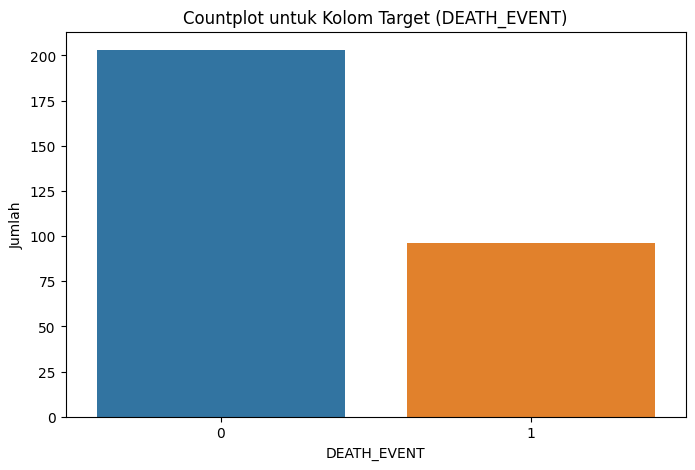

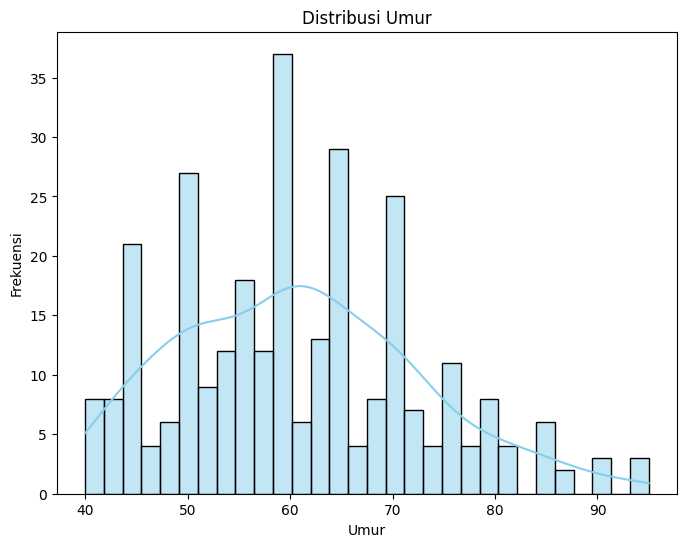

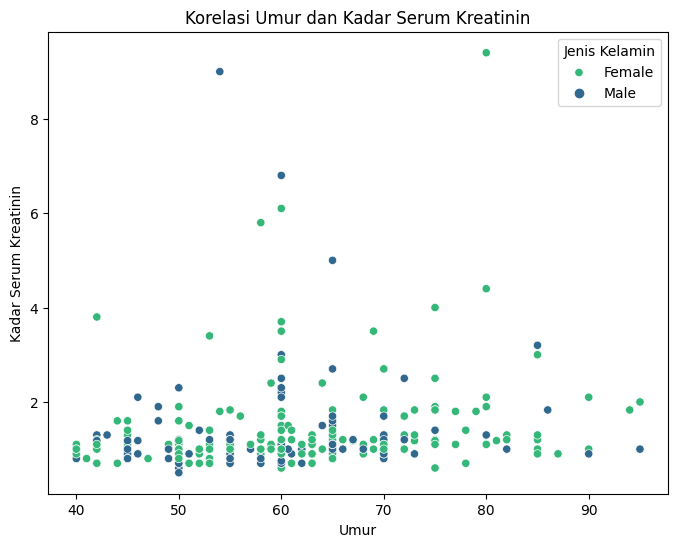

Informasi Umum tentang Dataset:
None

Jumlah Nilai yang Hilang:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Jumlah data untuk Kolom Target (DEATH_EVENT):
0    203
1     96
Name: DEATH_EVENT, dtype: int64

Statistik Deskriptif:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000   

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data dari URL CSV
url = "https://raw.githubusercontent.com/whintaaa/datapsd/main/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(url)


# Informasi Umum tentang Dataset
info = data.info()

# Statistik Deskriptif untuk Kolom-Kolom Numerik
describe = data.describe()

# Jumlah Nilai yang Hilang untuk Setiap Kolom
missing_values = data.isnull().sum()

# Beberapa Baris Pertama dari Dataset
head = data.head()

# Jumlah Unik untuk Kolom Target (DEATH_EVENT)
target_counts = data['DEATH_EVENT'].value_counts()

# Korelasi Antar Kolom Numerik
correlation_matrix = data.corr()

# Distribusi Umur (Age)
age_distribution = data['age'].value_counts()

# Visualisasi Data
plt.figure(figsize=(15, 10))

# Countplot untuk Kolom Target (DEATH_EVENT)
plt.figure(figsize=(8, 5))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Countplot untuk Kolom Target (DEATH_EVENT)')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Jumlah')
plt.show()

# Grafik distribusi umur (Age)
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Grafik korelasi antara umur (Age) dan kadar serum kreatinin (Serum Creatinine)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='serum_creatinine', data=data, hue='sex', palette='viridis')
plt.title('Korelasi Umur dan Kadar Serum Kreatinin')
plt.xlabel('Umur')
plt.ylabel('Kadar Serum Kreatinin')
plt.legend(title='Jenis Kelamin', loc='upper right', labels=['Female', 'Male'])
plt.show()

# Contoh menampilkan hasil
print("Informasi Umum tentang Dataset:")
print(info)

print("\nJumlah Nilai yang Hilang:")
print(missing_values)

print("\nJumlah data untuk Kolom Target (DEATH_EVENT):")
print(target_counts)

# Statistik deskriptif
statistics = data.describe()

# Menampilkan hasil
print("\nStatistik Deskriptif:")
print(statistics)



## Data Prepocessing

### Oversampling

Melihat jumlah masing-masing target pada kolom 'death event':

In [9]:
# Menghitung jumlah masing-masing target pada kolom 'death event'
jumlah_death_event_1 = df[df['DEATH_EVENT'] == 1].shape[0]
jumlah_death_event_0 = df[df['DEATH_EVENT'] == 0].shape[0]

# Menampilkan jumlah masing-masing target
print("Jumlah Target 'death event' dengan Nilai 1:", jumlah_death_event_1)
print("Jumlah Target 'death event' dengan Nilai 0:", jumlah_death_event_0)

Jumlah Target 'death event' dengan Nilai 1: 96
Jumlah Target 'death event' dengan Nilai 0: 203


Bisa dilihat jumlah target dengan nilai 1 = 96 dan nilai 0 = 203 ini menandakan bahwa jumlah target pada dataset tidak seimbang. Maka salah satu metode untuk menyeimbangkan target bisa menggunakan teknik oversampling.
Teknik oversampling adalah salah satu pendekatan untuk menyeimbangkan dataset yang tidak seimbang dengan meningkatkan jumlah sampel dalam kategori minoritas. Kategori minoritas adalah kelas target yang memiliki frekuensi yang lebih rendah dibandingkan dengan kelas mayoritas. Teknik oversampling dilakukan dengan cara menambahkan lebih banyak contoh dari kategori minoritas agar jumlahnya sebanding dengan kategori mayoritas.

Ada beberapa metode oversampling yang umum digunakan, dan salah satunya adalah RandomOverSampler. Dalam RandomOverSampler, sampel acak dari kategori minoritas ditambahkan kembali ke dataset hingga jumlahnya setara dengan jumlah sampel dalam kategori mayoritas.

Berikut adalah langkah-langkah umum untuk menggunakan teknik oversampling:

1. Identifikasi dataset yang tidak seimbang.
2. Pisahkan fitur (X) dan target (y).
3. Terapkan teknik oversampling pada kategori minoritas.
4. Gabungkan kembali data yang sudah diresampling.
5. Lanjutkan dengan analisis atau pemodelan seperti biasa.

Dengan menggunakan teknik oversampling, kita meningkatkan jumlah sampel di kategori minoritas (DEATH_EVENT = 1) sehingga seimbang dengan kategori mayoritas (DEATH_EVENT = 0).

In [10]:
# Print the column names to identify the correct target variable
print(df.columns)

# Pilih kolom-kolom yang perlu dinormalisasi / bertype numerik
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Langkah 3: Split data menjadi fitur (X) dan target (y)
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Menggunakan teknik oversampling dengan RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Membuat dataframe baru setelah oversampling
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Menampilkan jumlah target setelah oversampling
print("Jumlah Target setelah Oversampling:")
print(df_resampled['DEATH_EVENT'].value_counts())


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Jumlah Target setelah Oversampling:
1    203
0    203
Name: DEATH_EVENT, dtype: int64


### Normalisasi Menggunakan Zscore

Normalisasi Z-score adalah teknik normalisasi yang digunakan untuk mengubah setiap nilai dalam suatu variabel ke dalam skala yang memiliki rata-rata nol dan deviasi standar satu. Ini adalah cara umum untuk menormalkan data sehingga nilai-nilai yang berbeda dari variabel yang sama dapat dibandingkan secara langsung.

Proses normalisasi Z-score melibatkan mengurangkan rata-rata dari setiap nilai dalam variabel dan membaginya dengan deviasi standar. Formula normalisasi Z-score untuk suatu nilai \(x\) dalam variabel \(X\) adalah sebagai berikut:

$[ z = \frac{{x - \text{{mean}}(X)}}{{\text{{std}}(X)}} ]$

di mana:
- $( z $) adalah nilai hasil normalisasi (Z-score) dari $(x$).
- $( \text{{mean}}(X) $) adalah rata-rata dari variabel $(X$).
- $( \text{{std}}(X) $) adalah deviasi standar dari variabel $(X$).

Proses ini menghasilkan distribusi data yang memiliki rata-rata nol dan deviasi standar satu. Normalisasi Z-score sangat berguna dalam beberapa konteks, terutama ketika Anda ingin membandingkan nilai-nilai dari variabel yang memiliki skala yang berbeda.

sebelum di mormalisasi terdapat fitur boolean pada dataset maka harus dipidahkan dengan fitur numerik karena hanya fitur numerik yang akan di normalisasi kemudian normalisasi Z-score diaktifkan dengan parameter `normalize=True` dan `normalize_method='zscore'`. PyCaret akan otomatis menormalisasi fitur-fitur numerik yang ditentukan menggunakan normalisasi Z-score.
Lalu secara default pycaret akan membagi dataset menjadi 70% data train dan 30% data test, maka untuk dataset ini 209 menjadi data train dan 90 menjadi data test.

In [ ]:
# Print the column names to identify the correct target variable
print(df.columns)
# Pilih kolom-kolom yang perlu dinormalisasi / bertype numerik
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Split data menjadi fitur (X) dan target (y)
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Inisialisasi ekperimen PyCaret
exp = setup(data=df, target='DEATH_EVENT', normalize=True, normalize_method='zscore', numeric_features=numerical_columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


,Description,Value
0,Session id,8111
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(299, 13)"
4,Transformed data shape,"(299, 13)"
5,Transformed train set shape,"(209, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


## Modelling
### Mencari Model Terbaik Menggunakan Pycaret

Pycaret adalah library Python yang menyederhanakan proses pengembangan model machine learning. Dengan fitur otomatis seperti setup data, pemilihan model, optimasi hyperparameter, dan visualisasi hasil, Pycaret memungkinkan pengguna untuk fokus pada inti pemodelan tanpa menulis banyak kode. Berikut implementasi pycaret untuk mencari model terbaik untuk memprediksi resiko gagal jantung pada pasien:

In [ ]:
# Bandingkan model dan cari yang terbaik
best_model = compare_models()

best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8274,0.8750,0.6500,0.8216,0.6962,0.5805,0.6064,0.4490
lr,Logistic Regression,0.8131,0.8522,0.6476,0.7370,0.6703,0.5442,0.5588,0.1340
ridge,Ridge Classifier,0.8131,0.0000,0.6476,0.7370,0.6703,0.5442,0.5588,0.0800
lda,Linear Discriminant Analysis,0.8131,0.8535,0.6476,0.7370,0.6703,0.5442,0.5588,0.0660
gbc,Gradient Boosting Classifier,0.8129,0.8676,0.6762,0.7685,0.6904,0.5589,0.5808,0.1400
xgboost,Extreme Gradient Boosting,0.7938,0.8795,0.6786,0.7238,0.6787,0.5290,0.5449,0.1310
lightgbm,Light Gradient Boosting Machine,0.7938,0.8655,0.6643,0.7437,0.6740,0.5257,0.5457,0.2710
et,Extra Trees Classifier,0.7843,0.8326,0.4976,0.7825,0.5760,0.4448,0.4792,0.3380
ada,Ada Boost Classifier,0.7700,0.8135,0.5500,0.7420,0.5950,0.4430,0.4740,0.1260
dt,Decision Tree Classifier,0.7650,0.7179,0.6000,0.7023,0.5992,0.4397,0.4670,0.1620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=8111, verbose=0, warm_start=False)

## Evaluasi
### Menyimpan Model terbaik Menggunakan Pycaret

Bisa dilihat diatas bahwa model terbaik salah satunya adalah Random Forest Classifier. maka kita simpan model Random Forest Classifier untuk prediksi nantinya.

#### Random Forest Classifier:
Random Forest adalah algoritma machine learning yang termasuk dalam kategori ensemble learning. Ensemble learning menggabungkan prediksi dari beberapa model untuk meningkatkan performa dan ketahanan terhadap overfitting. Random Forest dapat digunakan untuk tugas klasifikasi (seperti prediksi kategori) dan regresi (prediksi nilai numerik).

#### Cara Kerja:

1. **Pembuatan Banyak Pohon (Trees):**
   - Random Forest terdiri dari sejumlah besar pohon keputusan yang dibuat secara acak. Setiap pohon dalam Random Forest dibuat berdasarkan subset acak dari data pelatihan dan fitur-fiturnya.

2. **Bootstrap Sampling (Bootstrapped Dataset):**
   - Pada setiap langkah pembuatan pohon, dilakukan bootstrap sampling, yaitu pengambilan sampel acak dengan penggantian dari dataset pelatihan. Beberapa data dapat muncul lebih dari sekali, dan beberapa mungkin tidak dipilih.

3. **Pemilihan Fitur Secara Acak:**
   - Pada setiap langkah pembuatan pohon, juga dilakukan pemilihan acak dari fitur-fitur yang tersedia. Ini membantu dalam menciptakan variasi antar pohon.

4. **Pembuatan Pohon Keputusan:**
   - Setiap pohon dibuat menggunakan data sampel dari bootstrap dan fitur yang dipilih secara acak. Pemisahan (split) di setiap node pohon dilakukan berdasarkan kriteria seperti Gini Impurity untuk klasifikasi atau Mean Squared Error untuk regresi.

5. **Voting (Klasifikasi):**
   - Untuk tugas klasifikasi, setelah semua pohon selesai membuat prediksi, hasilnya diambil berdasarkan mayoritas voting. Kelas dengan voting terbanyak dianggap sebagai prediksi akhir.

jika \(N\) adalah jumlah pohon dalam Random Forest, dan \(h_i(x)\) adalah hasil prediksi dari pohon ke-i, maka hasil akhir \(H(x)\) dari Random Forest dapat dihitung sebagai berikut:

**Rumus untuk Klasifikasi Random Forest:**

$[ H(x) = \text{{mode}}(h_1(x), h_2(x), \ldots, h_N(x)) $]

penjelasan:


- $(H(x)$) adalah prediksi akhir dari ensemble model.
- $(h_i(x)$) adalah prediksi dari model ke-$(i$).
- $(\text{{mode}}$) merujuk pada nilai yang paling sering muncul atau kelas yang paling sering diprediksi di antara prediksi model-individu.

Rumus ini, sesuai dengan prinsip mayoritas voting pada ensambel model seperti Random Forest. Model ensambel, seperti Random Forest, cenderung memberikan performa yang baik dalam berbagai jenis dataset, termasuk dataset kesehatan seperti "Heart failure clinical records".

Dalam kasus dataset kesehatan seperti ini, Random Forest bisa menjadi pilihan yang baik karena:

1. Robust terhadap Overfitting: Random Forest mampu mengatasi masalah overfitting yang mungkin muncul pada pohon keputusan tunggal, karena hasil mayoritas dari banyak pohon keputusan.

2. Tidak Sensitif terhadap Outliers: Random Forest dapat menangani data yang tidak seimbang dan keberadaan outlier dalam dataset.

3. Interpretability: Meskipun Random Forest cenderung tidak seinterpretatif pohon keputusan tunggal, tetapi masih memberikan pemahaman yang baik tentang pentingnya fitur dalam membuat keputusan.

4. Handling Fitur Numerik dan Kategorikal: Random Forest dapat menangani baik fitur numerik maupun kategorikal tanpa memerlukan transformasi khusus.

5. Performa yang Baik secara Umum: Random Forest umumnya memberikan performa yang baik tanpa perlu penyesuaian parameter yang terlalu rumit.



In [ ]:
best_model = create_model('rf')

# Simpan model terbaik ke dalam file pickle
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load model dari file pickle
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.9333,0.3333,1.0000,0.5000,0.4167,0.5130
1,0.8571,0.9222,0.5000,1.0000,0.6667,0.5882,0.6455
2,0.9524,0.9796,1.0000,0.8750,0.9333,0.8966,0.9014
3,0.8571,0.8163,0.7143,0.8333,0.7692,0.6667,0.6708
4,0.7143,0.8776,0.7143,0.5556,0.6250,0.4000,0.4082
5,0.7619,0.7194,0.5714,0.6667,0.6154,0.4444,0.4472
6,0.9524,1.0000,0.8571,1.0000,0.9231,0.8889,0.8944
7,0.8095,0.8265,0.4286,1.0000,0.6000,0.5000,0.5774
8,0.8095,0.8776,0.7143,0.7143,0.7143,0.5714,0.5714


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Prediksi Death_Event Menggunakan Random Forest Classifier (rf) dengan Data Baru


**Prediksi Menggunakan Random Forest untuk Klasifikasi:**

1. **Persiapkan Data Baru:**
   - Masukkan data baru ke dalam model dengan memberikan nilai untuk setiap fitur yang sesuai.

2. **Lakukan Prediksi pada Setiap Pohon:**
   - Setiap pohon dalam Random Forest memberikan prediksi berdasarkan data baru.

3. **Aggregasi Hasil Prediksi:**
   - Hasil prediksi dari setiap pohon diambil dan dihitung mayoritas voting.

4. **Tentukan Kelas Akhir:**
   - Hasil akhir diambil berdasarkan mayoritas voting sebagai kelas prediksi akhir.

Contoh Kode:
```python
# Membaca data baru yang akan diprediksi
new_data = pd.DataFrame([[age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time]], columns=X.columns)

# Memuat model terbaik dari file pickle
loaded_model = load_model('best_model')

# Melakukan prediksi pada data baru
predictions = predict_model(loaded_model, data=new_data)

# Menampilkan hasil prediksi
if predictions['prediction_label'].iloc[0] == 1:
    print("Hasil Prediksi: Pasien berisiko mengalami DEATH_EVENT")
else:
    print("Hasil Prediksi: Pasien tidak berisiko mengalami DEATH_EVENT")
```

Dalam kode ini, `prediction_label` adalah kolom yang berisi prediksi kelas (0 atau 1) dari model Random Forest untuk tugas klasifikasi. Jika nilai Label adalah 1, itu berarti pasien berisiko mengalami DEATH_EVENT; jika 0, itu berarti pasien tidak berisiko.

In [ ]:
# Membaca data baru yang akan diprediksi
age = float(input("Masukkan nilai Age: "))
anaemia = int(input("Masukkan nilai Anaemia (0 untuk Tidak, 1 untuk Ya): "))
creatinine_phosphokinase = float(input("Masukkan nilai Creatinine Phosphokinase: "))
diabetes = int(input("Masukkan nilai Diabetes (0 untuk Tidak, 1 untuk Ya): "))
ejection_fraction = float(input("Masukkan nilai Ejection Fraction: "))
high_blood_pressure = int(input("Masukkan nilai High Blood Pressure (0 untuk Tidak, 1 untuk Ya): "))
platelets = float(input("Masukkan nilai Platelets: "))
serum_creatinine = float(input("Masukkan nilai Serum Creatinine: "))
serum_sodium = float(input("Masukkan nilai Serum Sodium: "))
sex = int(input("Masukkan nilai Sex (0 untuk Perempuan, 1 untuk Laki-laki): "))
smoking = int(input("Masukkan nilai Smoking (0 untuk Tidak, 1 untuk Ya): "))
time = float(input("Masukkan nilai Time: "))

# Membuat data baru untuk prediksi
new_data = pd.DataFrame([[age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time]], columns=X.columns)

# Memuat model terbaik dari file pickle
loaded_model = load_model('best_model')

# Melakukan prediksi pada data baru
predictions = predict_model(loaded_model, data=new_data)

# Menampilkan hasil prediksi
if predictions['prediction_label'].iloc[0] == 1:
    print("Hasil Prediksi: Pasien berisiko mengalami DEATH_EVENT")
else:
    print("Hasil Prediksi: Pasien tidak berisiko mengalami DEATH_EVENT")


Masukkan nilai Age: 60
Masukkan nilai Anaemia (0 untuk Tidak, 1 untuk Ya): 0
Masukkan nilai Creatinine Phosphokinase: 582
Masukkan nilai Diabetes (0 untuk Tidak, 1 untuk Ya): 0
Masukkan nilai Ejection Fraction: 20
Masukkan nilai High Blood Pressure (0 untuk Tidak, 1 untuk Ya): 1
Masukkan nilai Platelets: 145000
Masukkan nilai Serum Creatinine: 1.4
Masukkan nilai Serum Sodium: 15
Masukkan nilai Sex (0 untuk Perempuan, 1 untuk Laki-laki): 1
Masukkan nilai Smoking (0 untuk Tidak, 1 untuk Ya): 0
Masukkan nilai Time: 9
Transformation Pipeline and Model Successfully Loaded


Hasil Prediksi: Pasien berisiko mengalami DEATH_EVENT


## Deployment
### Link Streamlit/Aplikasi Prediksi pada dataset Heart failure clinical records:
[https://psd-prediksi-jantung.streamlit.app](https://psd-prediksi-jantung.streamlit.app/)
